 # IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2
Group Number: 50

Group Members:
- Alessandro Jusack Hasian (18222025)
- Viktor Arsindiantoro Siringoringo (18222083)

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [89]:
df = pd.read_csv('train.csv')
df_testReal = pd.read_csv('test.csv')

# test = pd.read_csv('cek.csv')

In [8]:
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [9]:
df.tail()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
140399,235790,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.0,0.079963,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,235791,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.0,0.522907,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,235792,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,235794,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1
140403,235795,464776.txt,https://www.risenenergy.com,26.0,www.risenenergy.com,19.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,NaN,34.0,3.0,3.0,126.0,3.0,129.0,1


# REVISI SPLIT AWAL

In [90]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2,stratify=df["label"] , random_state=42)

In [91]:

from sklearn.impute import SimpleImputer

# Mendapatkan kolom numerik dan kategorikal
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# ?ini sbenerny dibwah numeric_cols sama categorical_cols train/test1 sama aja sih. cman ya lbh rapih aja
train_numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
train_categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

test1_numeric_cols = X_test1.select_dtypes(include=['float64', 'int64']).columns.tolist()
test1_categorical_cols = X_test1.select_dtypes(include=['object']).columns.tolist()

testReal_numeric_cols = df_testReal.select_dtypes(include=['float64', 'int64']).columns.tolist()
testReal_categorical_cols = df_testReal.select_dtypes(include=['object']).columns.tolist()

# Imputer untuk kolom numerik
numeric_imputer = SimpleImputer(strategy='mean')

# Imputer untuk kolom yang perlu diisi dengan median
median_cols = ['CharContinuationRate']

# Imputasi untuk kolom numerik
# df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
X_train[train_numeric_cols] = numeric_imputer.fit_transform(X_train[train_numeric_cols])
X_test1[test1_numeric_cols] = numeric_imputer.transform(X_test1[train_numeric_cols])
df_testReal[testReal_numeric_cols] = numeric_imputer.transform(df_testReal[testReal_numeric_cols])



# Imputasi untuk kolom yang perlu menggunakan median (misalnya 'CharContinuationRate')
median_imputer = SimpleImputer(strategy='median')
X_train[median_cols] = median_imputer.fit_transform(X_train[median_cols])
X_test1[median_cols] = median_imputer.transform(X_test1[median_cols])
df_testReal[median_cols] = median_imputer.transform(df_testReal[median_cols])


# Imputer untuk kolom kategorikal
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Imputasi untuk kolom kategorikal
X_train[train_categorical_cols] = categorical_imputer.fit_transform(X_train[train_categorical_cols])
X_test1[test1_categorical_cols] = categorical_imputer.fit_transform(X_test1[test1_categorical_cols])
df_testReal[testReal_categorical_cols] = categorical_imputer.fit_transform(df_testReal[testReal_categorical_cols])


# Periksa apakah ada nilai kosong setelah imputasi
print("X_train Null: " ,X_train.isnull().sum())
print( "X_test1 Null: ",X_test1.isnull().sum())
print( "df_testRealNull: ",df_testReal.isnull().sum())



X_train Null:  id                            0
FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore    

In [92]:

# ? ini hilnagin tipe object. BEGONE 
X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns)
X_test1 = X_test1.drop(columns=X_test1.select_dtypes(include='object').columns)
df_testReal = df_testReal.drop(columns=df_testReal.select_dtypes(include='object').columns)


In [52]:
def calculate_total_resources(X):
    total = X['NoOfImage'] + X['NoOfCSS'] + X['NoOfJS'] + X['NoOfSelfRef'] + X['NoOfEmptyRef'] + X['NoOfExternalRef']       
    X['resources'] = total
    return X
def feature_securing(data):
    data['IsHTTPS'] = data['IsHTTPS'].astype(int)
    data['Robots'] = data['Robots'].astype(int)
 

    Risk_Score = (1 - data['Robots']) * 3  
    
    # Menandai risiko tinggi jika skor risiko lebih besar dari 2
    data['isHighRisk'] = (Risk_Score > 2).astype(int)
    
 
    
    return data
def create_phishing_features(data):
    Phishing_Score = (
        data['HasExternalFormSubmit'] + 
        data['HasPasswordField'] + 
        data['Bank'] + 
        data['Crypto']
    )
    Non_Phishing_Score = (
        data['IsResponsive'] + 
        data['HasDescription'] + 
        data['HasSocialNet'] + 
        data['HasCopyrightInfo']
    )
    data['Phising'] = Phishing_Score

    return data
def create_NoNphishing_features(data):
    Non_Phishing_Score = (
        data['IsResponsive'] + 
        data['HasDescription'] + 
        data['HasSocialNet'] + 
        data['HasCopyrightInfo']
    )
    data['Non_Phising'] = Non_Phishing_Score

    return data
def apply_feature_engineering(X: pd.DataFrame) -> pd.DataFrame:
    X = create_phishing_features(X)
    X = create_NoNphishing_features(X)
    return X

In [93]:

X_train = apply_feature_engineering(X_train)
X_test1 = apply_feature_engineering(X_test1)
df_testReal = apply_feature_engineering(df_testReal)


In [54]:
def check_outliers_iqr(df,col):
    col_Q1 = df[col].quantile(0.25)
    col_Q3 = df[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    col_RLB = col_Q1 - 1.5 * col_IQR
    col_RUB = col_Q3 + 1.5 * col_IQR
    outliers = len(df.loc[(df[col]>col_RUB) | (df[col]<col_RLB)])
    return outliers/len(df)*100


In [55]:
print(f'Punya X_train')
for i in X_train.columns:
    print(f'Outliers for {i}: {check_outliers_iqr(X_train,i)}%')
    print(f'Data skew for {i}: {X_train[i].skew()}')
    


Punya X_train
Outliers for id: 0.0%
Data skew for id: 0.007342039922248667
Outliers for URLLength: 18.834967014769905%
Data skew for URLLength: 131.43439531525993
Outliers for DomainLength: 5.771747549477845%
Data skew for DomainLength: 2.571190916698636
Outliers for IsDomainIP: 0.03026984678115791%
Data skew for IsDomainIP: 57.44056577480507
Outliers for CharContinuationRate: 12.277093738593164%
Data skew for CharContinuationRate: -2.3321232072535354
Outliers for TLDLegitimateProb: 0.0%
Data skew for TLDLegitimateProb: -0.043850067255095625
Outliers for URLCharProb: 20.020832776902324%
Data skew for URLCharProb: -1.4623709133172147
Outliers for TLDLength: 20.765114891874326%
Data skew for TLDLength: 1.3846428005300837
Outliers for NoOfSubDomain: 11.37255949360327%
Data skew for NoOfSubDomain: 2.7243634796351515
Outliers for HasObfuscation: 0.01958637144663159%
Data skew for HasObfuscation: 71.41495042180905
Outliers for NoOfObfuscatedChar: 0.014244633779368429%
Data skew for NoOfObfus

In [56]:
print(print(f'Punya X_test1'))
for i in X_test1.columns:
    print(f'Outliers for {i}: {check_outliers_iqr(X_test1,i)}%')
    print(f'Data skew for {i}: {X_test1[i].skew()}')

Punya X"_test1
None
Outliers for id: 0.0%
Data skew for id: -0.00564485538837752
Outliers for URLLength: 19.07339482212172%
Data skew for URLLength: 128.5076763900977
Outliers for DomainLength: 5.779708699832628%
Data skew for DomainLength: 2.525443717283162
Outliers for IsDomainIP: 0.04985577436700973%
Data skew for IsDomainIP: 44.749601002929474
Outliers for CharContinuationRate: 12.264520494284392%
Data skew for CharContinuationRate: -2.321205746001212
Outliers for TLDLegitimateProb: 0.0%
Data skew for TLDLegitimateProb: -0.047189405228197666
Outliers for URLCharProb: 20.351839321961467%
Data skew for URLCharProb: -1.4440154525736661
Outliers for TLDLength: 20.903813966739076%
Data skew for TLDLength: 1.0128817303179434
Outliers for NoOfSubDomain: 11.267405006944198%
Data skew for NoOfSubDomain: 2.9069535276045313
Outliers for HasObfuscation: 0.028489013924005557%
Data skew for HasObfuscation: 59.21363555239231
Outliers for NoOfObfuscatedChar: 0.024927887183504863%
Data skew for NoO

In [94]:
print(print(f'Punya df_testReal'))
for i in df_testReal.columns:
    print(f'Outliers for {i}: {check_outliers_iqr(df_testReal,i)}%')
    print(f'Data skew for {i}: {df_testReal[i].skew()}')

Punya df_testReal
None
Outliers for id: 0.0%
Data skew for id: 0.026729630793782374
Outliers for URLLength: 12.21%
Data skew for URLLength: 9.160480309056599
Outliers for DomainLength: 8.67%
Data skew for DomainLength: 2.7358116726327144
Outliers for IsDomainIP: 0.19%
Data skew for IsDomainIP: 22.8788791861919
Outliers for CharContinuationRate: 16.49%
Data skew for CharContinuationRate: -1.7345205021707613
Outliers for TLDLegitimateProb: 0.0%
Data skew for TLDLegitimateProb: 0.011149253651689192
Outliers for URLCharProb: 17.419999999999998%
Data skew for URLCharProb: -1.602984117126685
Outliers for TLDLength: 23.3%
Data skew for TLDLength: 1.6253245968161223
Outliers for NoOfSubDomain: 15.9%
Data skew for NoOfSubDomain: 2.5783853248585813
Outliers for HasObfuscation: 0.16%
Data skew for HasObfuscation: 24.942989274392314
Outliers for NoOfObfuscatedChar: 22.85%
Data skew for NoOfObfuscatedChar: 47.199607431334634
Outliers for ObfuscationRatio: 0.12%
Data skew for ObfuscationRatio: 56.84

In [ ]:
import numpy as np

def feature_log_transformation(X: pd.DataFrame) -> pd.DataFrame:
    columns_to_transform = [
        'IsDomainIP', 'URLCharProb', 'NoOfLettersInURL', 'NoOfDegitsInURL',
        'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
        'LargestLineLength', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
        'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef',
        'URLLength', 'NoOfiFrame', 'NoOfObfuscatedChar',
        'HasObfuscation', 'ObfuscationRatio'
    ]
    X[columns_to_transform] = X[columns_to_transform].clip(lower=0.0001)
    for col in columns_to_transform:
        X[col] = np.log1p(X[col])
    return X




In [95]:

X_train = feature_log_transformation(X_train.copy())
X_test1 = feature_log_transformation(X_test1.copy())
df_testReal = feature_log_transformation(df_testReal.copy())


In [96]:

X_train=X_train.drop(columns=['id','DomainLength','NoOfOtherSpecialCharsInURL','IsHTTPS','HasFavicon','HasSubmitButton','HasHiddenFields','Pay'])
X_test1=X_test1.drop(columns=['id','DomainLength','NoOfOtherSpecialCharsInURL','IsHTTPS','HasFavicon','HasSubmitButton','HasHiddenFields','Pay'])
df_testReal=df_testReal.drop(columns=['id','DomainLength','NoOfOtherSpecialCharsInURL','IsHTTPS','HasFavicon','HasSubmitButton','HasHiddenFields','Pay'])


In [ ]:
#  ? buat mastiin aja

for i in X_train.columns : 
    print(i)
    print(X_train[i].describe())

for i in X_test1.columns : 
    print(i)
    print(X_test1[i].describe())


URLLength
count    112323.000000
mean          3.332324
std           0.181227
min           2.708050
25%           3.258097
50%           3.354890
75%           3.354890
max           8.153062
Name: URLLength, dtype: float64
IsDomainIP
count    112323.000000
mean          0.000410
std           0.012055
min           0.000100
25%           0.000100
50%           0.000100
75%           0.000433
max           0.693147
Name: IsDomainIP, dtype: float64
CharContinuationRate
count    112323.000000
mean          0.918147
std           0.129121
min           0.000000
25%           0.918147
50%           0.918147
75%           1.000000
max           1.000000
Name: CharContinuationRate, dtype: float64
TLDLegitimateProb
count    112323.000000
mean          0.277364
std           0.195896
min           0.000000
25%           0.079963
50%           0.277364
75%           0.522907
max           0.522907
Name: TLDLegitimateProb, dtype: float64
URLCharProb
count    112323.000000
mean          0.05756

In [97]:

from sklearn.preprocessing import RobustScaler

attributes = [
    "URLLength", 
    "TLDLength", 
    "NoOfSubDomain", 
    "NoOfObfuscatedChar", 
    "LineOfCode", 
    "DomainTitleMatchScore"
]


# Buat scaler
scaler = RobustScaler()


X_train[attributes] = scaler.fit_transform(X_train[attributes])
X_test1[attributes] = scaler.transform(X_test1[attributes])
df_testReal[attributes] = scaler.transform(df_testReal[attributes])




In [61]:
X_train.describe()

,URLLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Phising,Non_Phising
count,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,1.123230e+05,112323.000000,112323.000000,112323.000000,112323.000000,...,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000
mean,-0.233137,0.000410,0.918147,0.277364,0.057567,4.095380e-16,1.000000,0.000361,0.630886,0.000113,...,0.034669,0.750599,3.276180,2.108308,2.625648,4.069986,0.995893,3.936552,0.406903,2.983133
std,1.872300,0.012055,0.129121,0.195896,0.006075,1.602281e+00,2.287438,0.009698,13.738878,0.001135,...,0.146610,0.312098,1.102680,0.768086,0.784048,1.439041,0.903941,1.124628,0.489141,0.790460
min,-6.682672,0.000100,0.000000,0.000000,0.001426,-2.693342e+00,-6.207650,0.000100,0.000000,0.000100,...,0.000000,0.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000000,0.000000
25%,-1.000000,0.000100,0.918147,0.079963,0.056904,0.000000e+00,0.000000,0.000100,0.000000,0.000100,...,0.000000,0.750599,2.890372,1.791759,2.484907,3.891820,0.000100,3.663562,0.131320,2.546635
50%,0.000000,0.000100,0.918147,0.277364,0.057586,0.000000e+00,0.000000,0.000100,0.000000,0.000100,...,0.000000,0.750599,3.752825,2.370526,2.858135,4.651095,1.098612,4.368344,0.207380,3.232534
75%,0.000000,0.000433,1.000000,0.522907,0.060051,1.000000e+00,1.000000,0.000368,1.000000,0.000100,...,0.034669,1.000000,3.752825,2.370526,2.858135,4.651095,1.562316,4.368344,0.372234,3.546635
max,49.571165,0.693147,1.000000,0.522907,0.085045,3.793342e+01,31.038251,0.693147,1973.688119,0.192272,...,1.000000,1.000000,8.941415,6.948897,7.947679,9.904387,8.494539,10.222559,4.000000,4.000000


In [62]:
X_test1.describe()


,URLLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Phising,Non_Phising
count,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,...,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000,28081.000000
mean,-0.220758,0.000545,0.917688,0.277731,0.057597,-0.002774,1.007471,0.000423,0.864862,0.000118,...,0.033978,0.753056,3.285544,2.120406,2.627730,4.079156,0.994783,3.947788,0.409709,2.990173
std,1.910926,0.015470,0.128888,0.195942,0.006026,1.592083,2.293054,0.011695,27.937812,0.001284,...,0.144537,0.310155,1.092317,0.766140,0.787446,1.445053,0.900080,1.115675,0.492074,0.785644
min,-6.015908,0.000100,0.147059,0.000000,0.001228,-2.693342,-6.207650,0.000100,0.000000,0.000100,...,0.000000,0.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000000,0.000000
25%,-1.000000,0.000100,0.918147,0.079963,0.056924,0.000000,0.000000,0.000100,0.000000,0.000100,...,0.000000,0.750599,2.890372,1.791759,2.484907,3.891820,0.000100,3.663562,0.131320,2.546635
50%,0.000000,0.000100,0.918147,0.277364,0.057586,0.000000,0.000000,0.000100,0.000000,0.000100,...,0.000000,0.750599,3.752825,2.370526,2.858135,4.651095,1.098612,4.368344,0.207380,3.232534
75%,0.000000,0.000433,1.000000,0.522907,0.060028,1.000000,1.000000,0.000368,1.000000,0.000100,...,0.034669,1.000000,3.752825,2.370526,2.858135,4.651095,1.562316,4.368344,0.372234,3.546635
max,51.168832,0.693147,1.000000,0.522907,0.082361,26.853394,37.245902,0.693147,3480.809092,0.122218,...,1.000000,1.000000,9.100191,10.486290,6.629363,10.188554,7.236339,9.384462,4.000000,4.000000


In [98]:
df_testReal.describe()


,URLLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Phising,Non_Phising
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.883023,0.001511,0.865714,0.264550,0.054935,0.113781,1.029636,0.001300,2.548558,0.000207,...,0.026089,0.537160,2.477634,1.519481,2.000449,2.809904,0.685168,2.609858,0.316929,2.205069
std,3.868382,0.030178,0.178362,0.200188,0.008584,1.832799,3.143680,0.027698,57.704100,0.004056,...,0.127096,0.427791,1.688896,1.116420,1.270781,2.187390,0.871762,1.917773,0.463970,1.170585
min,-7.395456,0.000100,0.146341,0.000000,0.001223,-2.693342,-6.207650,0.000100,0.000000,0.000100,...,0.000000,0.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000000,0.000000
25%,-1.000000,0.000100,0.869565,0.028555,0.053061,0.000000,0.000000,0.000100,0.000000,0.000100,...,0.000000,0.000000,0.000100,0.000100,0.693147,0.000100,0.000100,0.693147,0.034669,1.436498
50%,0.000000,0.000100,0.918147,0.277364,0.057586,1.000000,0.000000,0.000100,0.000000,0.000100,...,0.000000,0.750599,3.433987,1.945910,2.858135,4.007333,0.000100,2.944439,0.172711,2.272905
75%,1.463086,0.000433,1.000000,0.522907,0.058089,1.000000,1.000000,0.000368,0.000000,0.000100,...,0.034669,1.000000,3.752825,2.370526,2.858135,4.651095,1.562316,4.368344,0.275583,3.297234
max,34.138657,0.693147,1.000000,0.522907,0.078864,19.466710,37.245902,0.693147,2261.884821,0.298622,...,1.000000,1.000000,7.515889,5.181784,5.652489,7.798523,6.586172,9.555206,3.172711,4.000000


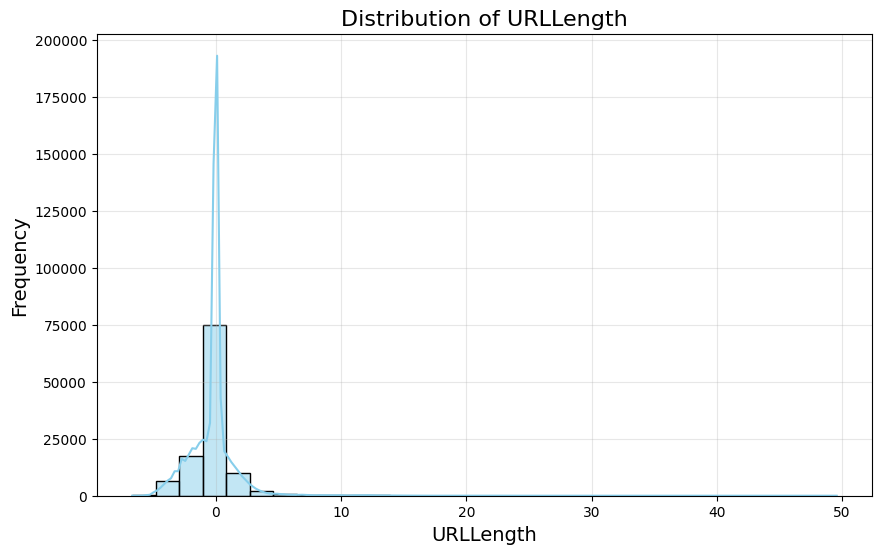

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['URLLength'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of URLLength', fontsize=16)
plt.xlabel('URLLength', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

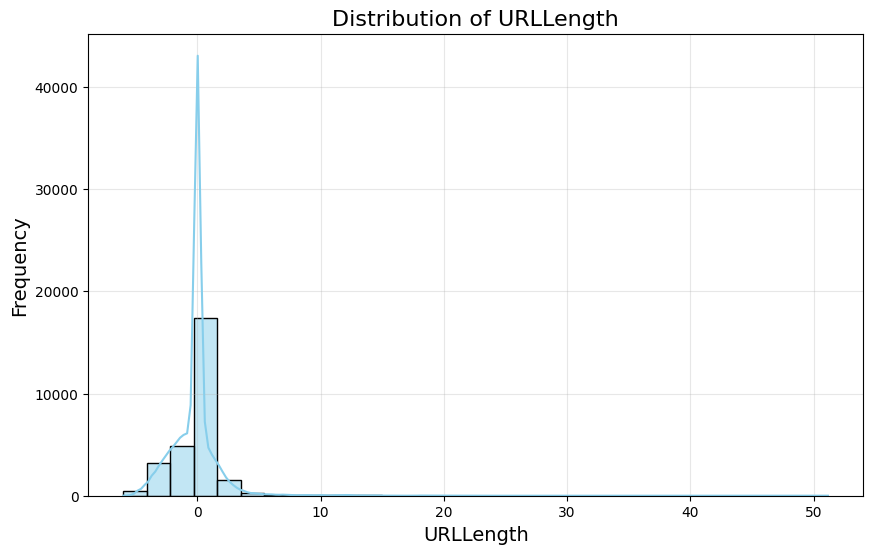

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(X_test1['URLLength'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of URLLength', fontsize=16)
plt.xlabel('URLLength', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test1)

In [66]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, cohen_kappa_score, balanced_accuracy_score, classification_report

In [67]:
# from sklearn.metrics import classification_report, f1_score
print(f'Accuracy: {accuracy_score(y_test1, knn_pred)}')
print(f'F1 Score: {f1_score(y_test1, knn_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test1, knn_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test1, knn_pred)}")
print("KNeighbors Classifier")
print(classification_report(y_test1, knn_pred))
print()

Accuracy: 0.9860403831772373
F1 Score: 0.9855714349632042
Recall Score: 0.9860403831772373
Balanced Accuracy: 0.9186858921683311
KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2111
           1       0.99      1.00      0.99     25970

    accuracy                           0.99     28081
   macro avg       0.98      0.92      0.95     28081
weighted avg       0.99      0.99      0.99     28081




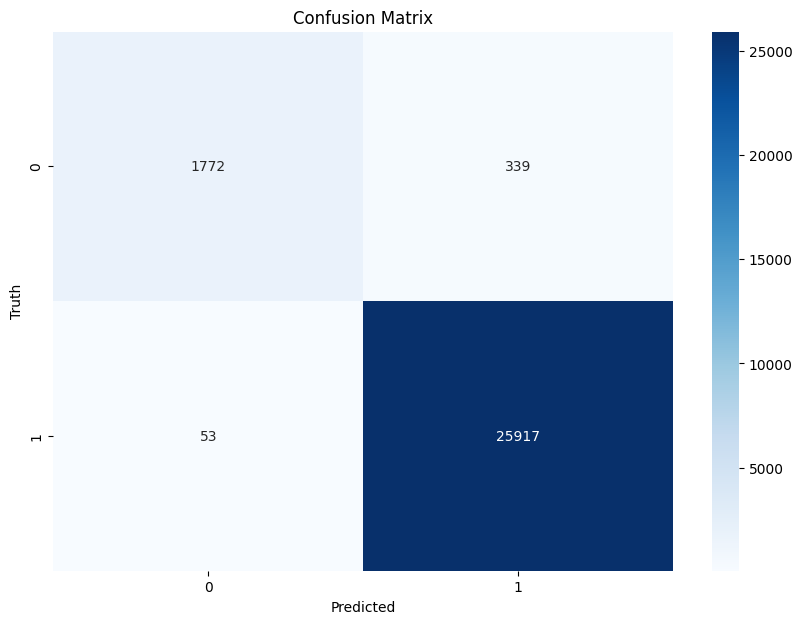

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, knn_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [100]:
knn.fit(X_train, y_train)

# create submission file
submission = pd.read_csv('sample_submission.csv')
submission['label'] = knn.predict(df_testReal)
submission.to_csv('submission.csv', index=False)
submission.head()

,id,label
0,48,1
1,68,0
2,76,1
3,155,1
4,167,0


In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test1)

In [75]:
print(f'Accuracy: {accuracy_score(y_test1, gnb_pred)}')
print(f'F1 Score: {f1_score(y_test1, gnb_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test1, gnb_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test1, gnb_pred)}")
print("GNB Classifier")

Accuracy: 0.9760692283038354
F1 Score: 0.975136445089498
Recall Score: 0.9760692283038354
Balanced Accuracy: 0.878261201068828
GNB Classifier


In [76]:
from sklearn.metrics import accuracy_score, f1_score, recall_score,balanced_accuracy_score, classification_report
print(classification_report(y_test1, gnb_pred))
print()

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      2111
           1       0.98      0.99      0.99     25970

    accuracy                           0.98     28081
   macro avg       0.94      0.88      0.91     28081
weighted avg       0.98      0.98      0.98     28081




Accuracy: 0.9760692283038354
F1 Score: 0.975136445089498
Recall Score: 0.9760692283038354
Balanced Accuracy: 0.878261201068828
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      2111
           1       0.98      0.99      0.99     25970

    accuracy                           0.98     28081
   macro avg       0.94      0.88      0.91     28081
weighted avg       0.98      0.98      0.98     28081


Confusion Matrix:
[[ 1611   500]
 [  172 25798]]


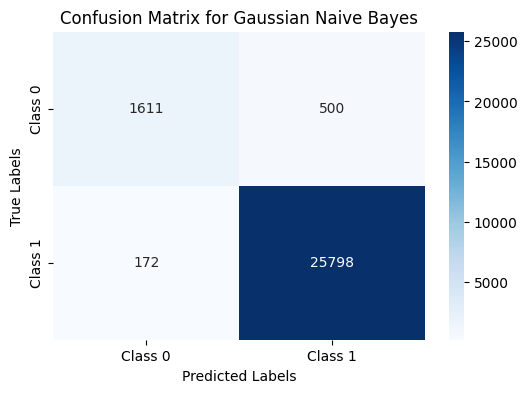

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
from sklearn.metrics import accuracy_score, f1_score, recall_score, cohen_kappa_score, balanced_accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test1, gnb_pred)}')
print(f'F1 Score: {f1_score(y_test1, gnb_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test1, gnb_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test1, gnb_pred)}")
print("Classification Report:")
print(classification_report(y_test1, gnb_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test1, gnb_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt
smote = SMOTE(random_state=42)

/home/dro/Projects/Tubes-2-IF3070/.env/lib64/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/dro/Projects/Tubes-2-IF3070/.env/lib64/python3.13/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.9805918592642712
F1 Score: 0.980287398196887
Recall Score: 0.9805918592642712
Balanced Accuracy: 0.9150873808225685
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2111
           1       0.99      0.99      0.99     25970

    accuracy                           0.98     28081
   macro avg       0.94      0.92      0.93     28081
weighted avg       0.98      0.98      0.98     28081


Confusion Matrix:
[[ 1769   342]
 [  203 25767]]


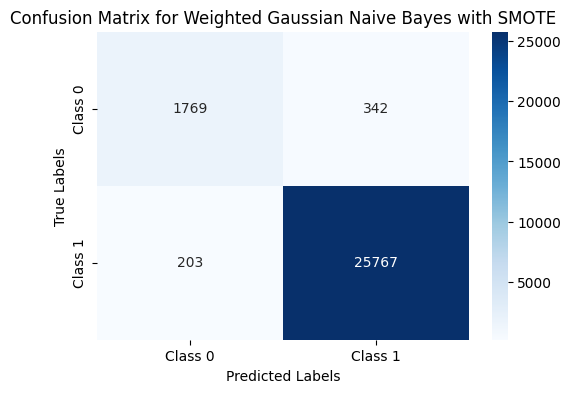

In [85]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_balanced)
sample_weights = y_train_balanced.map(lambda x: class_weights[int(x)])
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights)
gnb_pred = gnb.predict(X_test1)
print(f'Accuracy: {accuracy_score(y_test1, gnb_pred)}')
print(f'F1 Score: {f1_score(y_test1, gnb_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test1, gnb_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test1, gnb_pred)}")
print("Classification Report:")
print(classification_report(y_test1, gnb_pred))
cm = confusion_matrix(y_test1, gnb_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Weighted Gaussian Naive Bayes with SMOTE")
plt.show()


In [ ]:
# ?TODO PERBAIKI YANG BAWAH + BIKIN MODEL


train = pd.read_csv("train.csv")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='mean')
median_cols = ['CharContinuationRate']
train[numeric_cols] = numeric_imputer.fit_transform(train[numeric_cols])
median_imputer = SimpleImputer(strategy='median')
train[median_cols] = median_imputer.fit_transform(train[median_cols])
categorical_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = categorical_imputer.fit_transform(train[categorical_cols])

train = apply_feature_engineering(train)

X = train.drop(columns=['label'])
y = train['label']
X_test = test.drop(columns=['label'])
y_test = test['label']

preprocessor = Pipeline(steps=[
    ("remove_object_columns", FunctionTransformer(
        lambda X: X.select_dtypes(exclude=["object"]), validate=False)),
    ("log_transform", FunctionTransformer(
        lambda X: np.log1p(np.maximum(X, 0)), validate=False)),  
    ("scaler", MinMaxScaler())
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=6))
])

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test1, y_test1)
print("Model Score:", score)


In [34]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, classification_report

def euclidean_distance_single(x, X_train):
    distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
    return distances
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = euclidean_distance_single(x, self.X_train)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)
X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNN(k=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, knn_pred)}')
print(f'F1 Score: {f1_score(y_test, knn_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test, knn_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, knn_pred)}")
print(classification_report(y_test, knn_pred))

Accuracy: 0.9865389409209073
F1 Score: 0.9861430768295348
Recall Score: 0.9865389409209073
Balanced Accuracy: 0.92495823596636
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      2152
         1.0       0.99      1.00      0.99     25929

    accuracy                           0.99     28081
   macro avg       0.98      0.92      0.95     28081
weighted avg       0.99      0.99      0.99     28081



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, classification_report
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler

class KNNKDTree:
    def __init__(self, k=3):
        self.k = k
        self.tree = None

    def fit(self, X, y):
        self.tree = KDTree(X)
        self.y_train = y

    def predict(self, X):
        # Query the KDTree for k nearest neighbors
        distances, indices = self.tree.query(X, k=self.k)
        predictions = []
        for idx in indices:
            k_nearest_labels = self.y_train[idx]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)
X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy().astype(int)
pca = PCA(n_components=21) 
X_reduced = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
best_k = None
best_score = 0
for k in range(1, 11):  # Nilai k dari 1 hingga 10
    # Inisialisasi model KNNKDTree dengan jumlah tetangga k
    knn = KNNKDTree(k=k)  # Menggunakan parameter 'k' yang benar
    knn.fit(X_train, y_train)  # Melatih model pada data training
    knn_pred = knn.predict(X_test)  # Membuat prediksi pada data testing
    
    # Evaluasi metrik
    accuracy = accuracy_score(y_test, knn_pred)
    f1 = f1_score(y_test, knn_pred, average="weighted")
    recall = recall_score(y_test, knn_pred, average="weighted")
    balanced_acc = balanced_accuracy_score(y_test, knn_pred)
    
    # Cetak hasil evaluasi untuk k saat ini
    print(f"k={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(classification_report(y_test, knn_pred))
    print("-" * 50)
    
    # Update k terbaik jika akurasi saat ini lebih baik
    if accuracy > best_score:
        best_k = k
        best_score = accuracy

# Cetak k terbaik dengan skor akurasi tertinggi
print(f"\nK terbaik adalah {best_k} dengan akurasi tertinggi {best_score:.4f}")



In [ ]:
# TODO ganti urutan/ hapus pca

import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, classification_report
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  
import pandas as pd 
class KNNKDTree:
    def __init__(self, k=3):
        self.k = k
        self.tree = None

    def fit(self, X, y):
        self.tree = KDTree(X)
        self.y_train = y

    def predict(self, X):
        # Query KDTree untuk k tetangga terdekat
        distances, indices = self.tree.query(X, k=self.k)
        predictions = []
        for idx in indices:
            k_nearest_labels = self.y_train[idx]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)

X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy().astype(int)

pca = PCA(n_components=21) 
X_reduced = pca.fit_transform(X)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_reduced, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
best_k = None
best_score = 0
for k in range(1, 11): 
    knn = KNNKDTree(k=k)
    knn.fit(X_train, y_train)  
    knn_pred = knn.predict(X_test)  
    accuracy = accuracy_score(y_test, knn_pred)
    f1 = f1_score(y_test, knn_pred, average="weighted")
    recall = recall_score(y_test, knn_pred, average="weighted")
    balanced_acc = balanced_accuracy_score(y_test, knn_pred)
    print(f"k={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(classification_report(y_test, knn_pred))
    print("-" * 50)
    
    # Update k terbaik
    if accuracy > best_score:
        best_k = k
        best_score = accuracy

# Cetak hasil k terbaik
print(f"\nK terbaik adalah {best_k} dengan akurasi tertinggi {best_score:.4f}")

In [ ]:
# pip install imbalanced-learn


In [ ]:
from sklearn.decomposition import PCA
# Jalankan PCA dengan semua komponen untuk analisis
pca_full = PCA()
pca_full.fit(X)

# Hitung explained variance ratio dan cumulative variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Tentukan jumlah komponen optimal (90% threshold)
n_components_optimal = np.argmax(cumulative_variance >= 0.99999) + 1
print(f"Jumlah komponen optimal: {n_components_optimal}")

# Visualisasi cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.9999, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.title('Optimal Number of Components')
plt.grid()
plt.show()

# Jalankan PCA dengan jumlah komponen optimal
pca = PCA(n_components=n_components_optimal)
X_reduced = pca.fit_transform(X)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time
results = []
for n in range(1, X.shape[1] + 1):  # Evaluasi untuk semua komponen
    start_time = time.time()  # Catat waktu mulai
    
    print(f"\nEvaluating n_components={n}...")
    
    # Split data sebelum SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"  Data Split: Train shape = {X_train.shape}, Test shape = {X_test.shape}")
    
    # SMOTE hanya di training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"  SMOTE Done: Resampled Train shape = {X_train_resampled.shape}")
    
    # Reduksi dimensi dengan PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_resampled)
    X_test_pca = pca.transform(X_test)  # Transformasi test data pakai PCA yang sama
    print(f"  PCA Done: Reduced Train shape = {X_train_pca.shape}, Test shape = {X_test_pca.shape}")
    
    # KNN Training
    knn = KNNKDTree(k=3)  # Anda dapat mengganti k sesuai kebutuhan
    knn.fit(X_train_pca, y_train_resampled)
    print("  KNN Training Done.")
    
    # KNN Prediction
    y_pred = knn.predict(X_test_pca)
    print("  KNN Prediction Done.")
    
    # Evaluasi akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results.append((n, accuracy))
    print(f"  Accuracy={accuracy:.4f}")
    
    # Waktu eksekusi per iterasi
    elapsed_time = time.time() - start_time
    print(f"  Iteration Time: {elapsed_time:.2f} seconds")


best_n, best_accuracy = max(results, key=lambda x: x[1])
print(f"\nJumlah komponen terbaik: {best_n} dengan akurasi: {best_accuracy:.4f}")


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Melatih PCA tanpa menentukan n_components terlebih dahulu
pca = PCA()
pca.fit(df)  # Gantikan X dengan data Anda

# Hitung variansi kumulatif yang dijelaskan
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tentukan jumlah komponen yang mencakup setidaknya 95% variansi
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Jumlah komponen untuk menjelaskan 95% variansi: {n_components}")